# Logistic Regression
Also known as Logit

- Pima Indians Diabates

### Supervised machine learning
Classifier

### Import required packages

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,\
                            classification_report, roc_auc_score,log_loss, plot_roc_curve, precision_recall_curve

In [118]:
#cars = pd.read_csv('mtcars.csv')  # am = 1 means auto, 0 means manual

df = pd.read_csv('pima-indians-diabetes.csv')

In [119]:
df.head()

,Pregnancy,Plasmaglucose,Diastolicpresssure,Skinthickness,Insulintest,Bodymassindex,Diabetespedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
df.shape

(768, 9)

In [121]:
df.isnull().sum()

Pregnancy             0
Plasmaglucose         0
Diastolicpresssure    0
Skinthickness         0
Insulintest           0
Bodymassindex         0
Diabetespedigree      0
age                   0
class                 0
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pregnancy           768 non-null    int64  
 1   Plasmaglucose       768 non-null    int64  
 2   Diastolicpresssure  768 non-null    int64  
 3   Skinthickness       768 non-null    int64  
 4   Insulintest         768 non-null    int64  
 5   Bodymassindex       768 non-null    float64
 6   Diabetespedigree    768 non-null    float64
 7   age                 768 non-null    int64  
 8   class               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Exploratory Data Analysis

### Class distribution
Whether the dataset balanced or not?

0    500
1    268
Name: class, dtype: int64
0    0.651042
1    0.348958
Name: class, dtype: float64


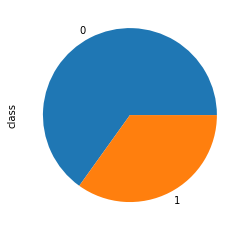

In [123]:
print(df['class'].value_counts())
df['class'].value_counts().plot(kind='pie')
print(df['class'].value_counts()/df.shape[0])

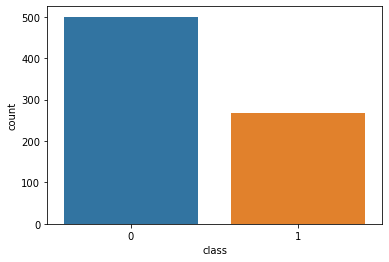

In [124]:
sns.countplot(df['class'])

### Observation : Unbalanced dataset

In [125]:
df.describe()

,Pregnancy,Plasmaglucose,Diastolicpresssure,Skinthickness,Insulintest,Bodymassindex,Diabetespedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Handling erroneous data points

In [126]:
df[['Plasmaglucose', 'Diastolicpresssure', 'Skinthickness', 'Insulintest', 'Bodymassindex']].min()

Plasmaglucose         0.0
Diastolicpresssure    0.0
Skinthickness         0.0
Insulintest           0.0
Bodymassindex         0.0
dtype: float64

### Replace errorneous data points with np.NaN

In [127]:
df.loc[:,['Plasmaglucose', 'Diastolicpresssure', 'Skinthickness','Bodymassindex']] = \
         df.loc[:,['Plasmaglucose', 'Diastolicpresssure', 'Skinthickness', 'Bodymassindex']].replace(0, np.NaN)

### Verify errous data points

In [128]:
df[['Plasmaglucose', 'Diastolicpresssure', 'Skinthickness', 'Bodymassindex']].min()

Plasmaglucose         44.0
Diastolicpresssure    24.0
Skinthickness          7.0
Bodymassindex         18.2
dtype: float64

In [129]:
df.isnull().sum()

Pregnancy               0
Plasmaglucose           5
Diastolicpresssure     35
Skinthickness         227
Insulintest             0
Bodymassindex          11
Diabetespedigree        0
age                     0
class                   0
dtype: int64

### Compute median values

In [130]:
print(df.groupby('class')[['Plasmaglucose', 'Diastolicpresssure', 'Skinthickness', 'Bodymassindex']].median())
mdn = df.groupby('class')[['Plasmaglucose', 'Diastolicpresssure', 'Skinthickness', 'Bodymassindex']].median()

       Plasmaglucose  Diastolicpresssure  Skinthickness  Bodymassindex
class                                                                 
0              107.0                70.0           27.0           30.1
1              140.0                74.5           32.0           34.3


In [131]:
mdn.loc[0,'Plasmaglucose'], mdn.loc[0,'Diastolicpresssure']

(107.0, 70.0)

In [132]:
mdn

,Plasmaglucose,Diastolicpresssure,Skinthickness,Bodymassindex
class,,,,
0,107.0,70.0,27.0,30.1
1,140.0,74.5,32.0,34.3


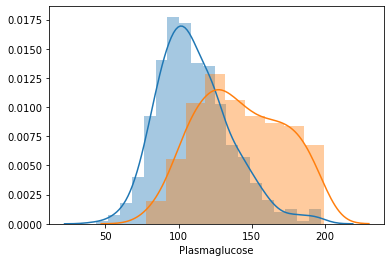

In [133]:
sns.distplot(df[df['class']==0]['Plasmaglucose'])
sns.distplot(df[df['class']==1]['Plasmaglucose'])

### Replace the erroneous data points with medians

In [134]:
for col in ['Plasmaglucose', 'Diastolicpresssure', 'Skinthickness', 'Bodymassindex']:
    
    filter = (df['class'] == 0) & (df[col].isnull())
    df.loc[filter,col]  = mdn.loc[0,col]
    
    filter = (df['class'] == 1) & (df[col].isnull())
    df.loc[filter,col]  = mdn.loc[1,col]


In [135]:
df

,Pregnancy,Plasmaglucose,Diastolicpresssure,Skinthickness,Insulintest,Bodymassindex,Diabetespedigree,age,class
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,32.0,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112,26.2,0.245,30,0
766,1,126.0,60.0,32.0,0,30.1,0.349,47,1


### Correlation : should avoid multicollinearity

In [136]:
df.corr()

,Pregnancy,Plasmaglucose,Diastolicpresssure,Skinthickness,Insulintest,Bodymassindex,Diabetespedigree,age,class
Pregnancy,1.000000,0.130155,0.209151,0.089028,-0.073535,0.023890,-0.033523,0.544341,0.221898
Plasmaglucose,0.130155,1.000000,0.225141,0.229289,0.330868,0.236171,0.138353,0.268910,0.495990
Diastolicpresssure,0.209151,0.225141,1.000000,0.199349,-0.045883,0.286399,-0.001443,0.325135,0.174469
Skinthickness,0.089028,0.229289,0.199349,1.000000,0.116663,0.566086,0.106280,0.129537,0.295138
Insulintest,-0.073535,0.330868,-0.045883,0.116663,1.000000,0.186580,0.185071,-0.042163,0.130548
Bodymassindex,0.023890,0.236171,0.286399,0.566086,0.186580,1.000000,0.152771,0.027849,0.315577
Diabetespedigree,-0.033523,0.138353,-0.001443,0.106280,0.185071,0.152771,1.000000,0.033561,0.173844
age,0.544341,0.268910,0.325135,0.129537,-0.042163,0.027849,0.033561,1.000000,0.238356
class,0.221898,0.495990,0.174469,0.295138,0.130548,0.315577,0.173844,0.238356,1.000000


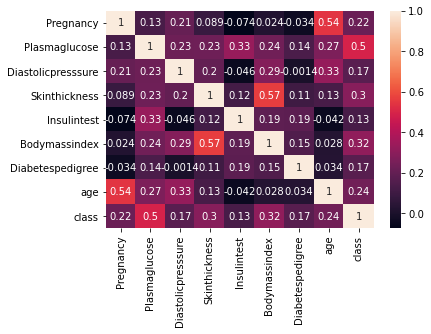

In [137]:
sns.heatmap(df.corr(), annot=True)

### Verify again

In [138]:
df.isnull().sum()

Pregnancy             0
Plasmaglucose         0
Diastolicpresssure    0
Skinthickness         0
Insulintest           0
Bodymassindex         0
Diabetespedigree      0
age                   0
class                 0
dtype: int64

In [139]:
df[['Plasmaglucose', 'Diastolicpresssure', 'Skinthickness', 'Bodymassindex']].min()

Plasmaglucose         44.0
Diastolicpresssure    24.0
Skinthickness          7.0
Bodymassindex         18.2
dtype: float64

In [140]:
cols = df.columns[:-1]
cols

Index(['Pregnancy', 'Plasmaglucose', 'Diastolicpresssure', 'Skinthickness',
       'Insulintest', 'Bodymassindex', 'Diabetespedigree', 'age'],
      dtype='object')

### Bi-variate analysis

sns.pairplot(df[cols])

### Pregnancy vs Class

In [141]:
pd.crosstab(df['class'], df.Pregnancy)

Pregnancy,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
class,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


In [142]:
df[['class','Pregnancy']].corr(method='spearman')

,class,Pregnancy
class,1.000000,0.198689
Pregnancy,0.198689,1.000000


### Age vs Class

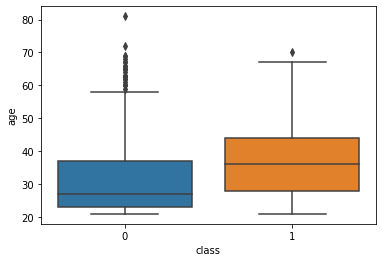

In [143]:
sns.boxplot(y = 'age', x='class', data=df)

### BMI vs Class

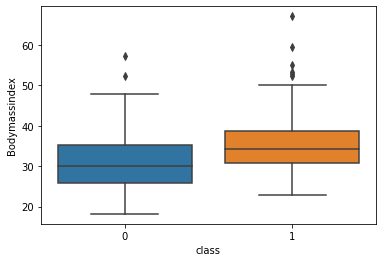

In [144]:
sns.boxplot(y = 'Bodymassindex', x = 'class', data=df)

### Insulintest vs Class

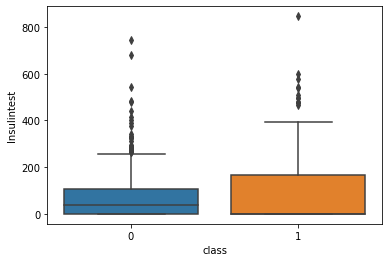

In [145]:
sns.boxplot(y = 'Insulintest', x = 'class', data=df)

In [146]:
np.median(df[df['class']==1]['Insulintest'])

0.0

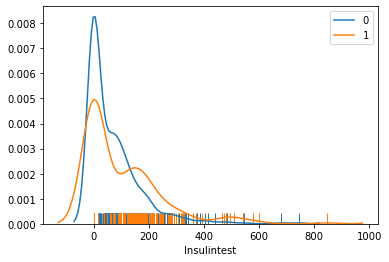

In [147]:
sns.distplot(df[df['class']==0]['Insulintest'], hist=False, rug=True, label="0")
sns.distplot(df[df['class']==1]['Insulintest'], hist=False, rug=True, label='1')

### Skin thickness vs Class

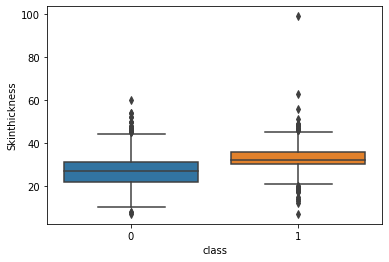

In [148]:
sns.boxplot(y = 'Skinthickness', x = 'class', data=df)

In [149]:
cols

Index(['Pregnancy', 'Plasmaglucose', 'Diastolicpresssure', 'Skinthickness',
       'Insulintest', 'Bodymassindex', 'Diabetespedigree', 'age'],
      dtype='object')

### Plasma Glucose vs Class

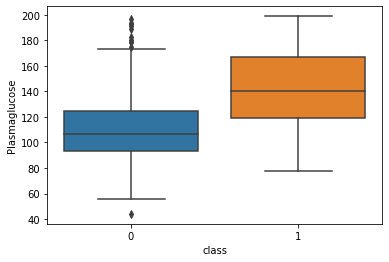

In [150]:
sns.boxplot(y = 'Plasmaglucose', x = 'class', data=df)

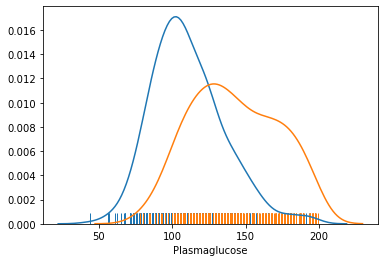

In [151]:
sns.distplot(df[df['class']==0]['Plasmaglucose'], hist=False, rug=True)
sns.distplot(df[df['class']==1]['Plasmaglucose'], hist=False, rug=True)

### Diastolicpresssure vs Class

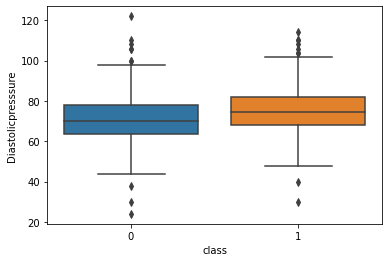

In [152]:
sns.boxplot(y = 'Diastolicpresssure', x = 'class', data=df)

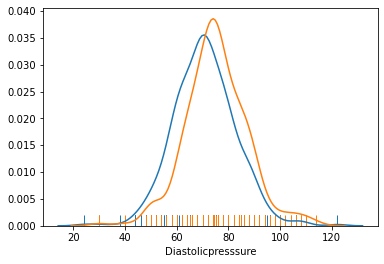

In [153]:
sns.distplot(df[df['class']==0]['Diastolicpresssure'], hist=False, rug=True)
sns.distplot(df[df['class']==1]['Diastolicpresssure'], hist=False, rug=True)

### Diabetes Pedigree vs Class

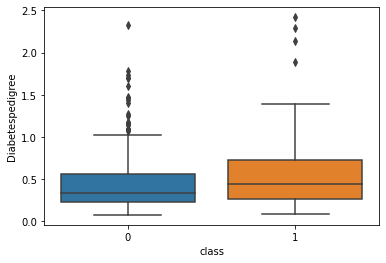

In [154]:
sns.boxplot(y = 'Diabetespedigree', x = 'class', data=df)

In [155]:
df.columns

Index(['Pregnancy', 'Plasmaglucose', 'Diastolicpresssure', 'Skinthickness',
       'Insulintest', 'Bodymassindex', 'Diabetespedigree', 'age', 'class'],
      dtype='object')

### Feature selection - SelectKBest

In [156]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [157]:
all_features = set(df.columns)-set(['class'])

select_feature = SelectKBest(chi2, k = 8)                       # For classification

#select_feature = SelectKBest(score_func=f_regression, k=8)   # For regression

trn = select_feature.fit_transform(df.loc[:,all_features], df.loc[:,'class'])

filter = select_feature.get_support()

print(filter)

important_features = np.array(df.loc[:,all_features].columns)[filter]
important_features

[ True  True  True  True  True  True  True  True]


array(['Skinthickness', 'Plasmaglucose', 'Diabetespedigree',
       'Bodymassindex', 'Pregnancy', 'age', 'Diastolicpresssure',
       'Insulintest'], dtype=object)

In [158]:
X = df.loc[:,important_features]

#X = df.loc[:,cols]

y = df['class']

### Split the data

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state = 10)

In [160]:
X_train.shape, X_test.shape

((652, 8), (116, 8))

### Build the model

In [161]:
model = LogisticRegression(max_iter=250, class_weight = 'balanced') # or 

### Train the model

In [162]:
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=250)

### Model attributes

In [163]:
model.classes_

array([0, 1], dtype=int64)

In [164]:
model.coef_

array([[ 0.04915156,  0.03932233,  0.84183057,  0.05700683,  0.08529199,
         0.01902513, -0.0075042 , -0.00147827]])

In [165]:
model.intercept_

array([-9.02498392])

### Test the model (trainging data)

In [166]:
y_predict_train=model.predict(X_train)
train_accuracy = accuracy_score(y_train,y_predict_train)
print(train_accuracy)

0.75920245398773


In [167]:
pd.crosstab(y_train, y_predict_train, normalize='index')

col_0,0,1
class,,
0,0.767606,0.232394
1,0.256637,0.743363


### Test the model (Test data)

In [168]:
y_predict_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test,y_predict_test)   # TP=1, TN=8, FP=1, FN=0
print(test_accuracy)

0.8103448275862069


In [169]:
pd.crosstab(y_test, y_predict_test)

col_0,0,1
class,,
0,59,15
1,7,35


### Probability (Training data)

In [170]:
y_predict_probability = model.predict_proba(X_train)

In [171]:
y_predict_probability

array([[0.97890208, 0.02109792],
       [0.3234273 , 0.6765727 ],
       [0.83967919, 0.16032081],
       ...,
       [0.8942602 , 0.1057398 ],
       [0.43508347, 0.56491653],
       [0.73504903, 0.26495097]])

### Test data

In [172]:
confusion_matrix(y_test,y_predict_test)

array([[59, 15],
       [ 7, 35]], dtype=int64)

In [173]:
pd.crosstab(y_test,y_predict_test)

col_0,0,1
class,,
0,59,15
1,7,35


### Types of Error

Type 1 Error : False positive

Type 2 Error : False negative

In [174]:
pd.crosstab(y_test,y_predict_test)

col_0,0,1
class,,
0,59,15
1,7,35


### Model accuracy

Accuracy = (TP+TN) / (TP+TN+FP+FN)

In [175]:
y_predict_train=model.predict(X_test)
accuracy_score(y_test,y_predict_test)

0.8103448275862069

### Precision  (True positive)
Precision = True positives(TP)/ (True positives(TP) + False positives(FP)) 

In [176]:
precision_score(y_test,y_predict_test)

0.7

In [177]:
TP = pd.crosstab(y_test,y_predict_test)[1][1]
FP = pd.crosstab(y_test,y_predict_test)[1][0]
print('TP : ', TP, ' FP : ', FP)

print(TP/(TP+FP))

TP :  35  FP :  15
0.7


In [178]:
pd.crosstab(y_test,y_predict_test)

col_0,0,1
class,,
0,59,15
1,7,35


### Recall or Sensitivity  or TPR (True Positive Rate)
Recall = TP / (TP+FN)

In [179]:
recall_score(y_test,y_predict_test)

0.8333333333333334

In [180]:
TP = pd.crosstab(y_test,y_predict_test)[1][1]
FN = pd.crosstab(y_test,y_predict_test)[0][1]
print('TP : ', TP, ' FN : ', FN)

print(TP/(TP+FN))

TP :  35  FN :  7
0.8333333333333334


### Specificity
Specificity = TN / (TN + FP)

In [181]:
TN = pd.crosstab(y_test,y_predict_test)[0][0]
FP = pd.crosstab(y_test,y_predict_test)[1][0]
print('TN : ', TN, ' FP : ', FP)

print(TN/(TN+FP))

TN :  59  FP :  15
0.7972972972972973


### Classification report

In [182]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        74
           1       0.70      0.83      0.76        42

    accuracy                           0.81       116
   macro avg       0.80      0.82      0.80       116
weighted avg       0.82      0.81      0.81       116



### ROC curve
Receiver operating characteristic (ROC)

TPR = TP / (TP + FN)

FPR = FP / (FP + TN)

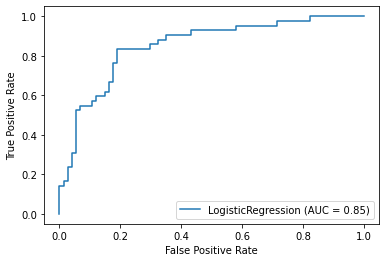

In [183]:
plot_roc_curve(model, X_test, y_test, drop_intermediate = False)

### AUC and Logloss

In [184]:
print('AUC-ROC:',roc_auc_score(y_test, y_predict_test))
print('LOGLOSS Value is',log_loss(y_test, y_predict_test))

AUC-ROC: 0.8153153153153153
LOGLOSS Value is 6.550560988357654


### K-fold cross validation

In [185]:
from sklearn.model_selection import cross_val_score

In [186]:
score = cross_val_score(model,X_train,y_train, cv=3, verbose=2)
score

[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


array([0.74770642, 0.74654378, 0.77880184])

In [187]:
score.mean(), score.std()

(0.7576840147127214, 0.014940101484768806)